# Data segmentation

In this notebook we combine data segmentation and classification methods.

In [1]:
# os.getcwd() + '/../Dataset/fraud_oracle.csv'

# to retrieve files
import os.path
# for logging purposes
import logging
# for mathematical calculations on lists and dataframes
import numpy as np
# for CSV and dataframe operations
import pandas as pd
# for plots
import matplotlib.pyplot as plt
# for mathematical calculations
import math
# import the label encoder from sklearn
from sklearn.preprocessing import LabelEncoder
# for training and testing split
from sklearn.model_selection import train_test_split
# for the decision tree
from sklearn.tree import DecisionTreeClassifier
# to export and save it to JPG later on
from sklearn.tree import export_graphviz
# to export the tree structure
from sklearn.tree.export import export_text
# to save the log file name
from datetime import datetime

file_name_time = datetime.utcnow().strftime('%Y-%m-%d_%H_%M_%S_%f')[:-3]

__file__ = 'Data_segmentation_' + file_name_time

# initializing the logger
logging.basicConfig(filename=os.getcwd() + '/../Log_files/' + __file__ + '.log',
                    filemode='a',
                    format='%(asctime)s %(levelname)s %(message)s',
                    datefmt='%H:%M:%S',
                    level=logging.DEBUG)

logging.info("Initialized logger")
print("Initialized logger")

logging.info("File name time is " + file_name_time)
print("File name time is", file_name_time)

logging.info("#### Run started ####")

Initialized logger
File name time is 2023-09-25_19_02_16_028


C:\Users\berna\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Read the sorted data
data = pd.read_csv(os.getcwd() + '/../Dataset/fraud_oracle.csv')

In [3]:
# The top 5 most important features were identified to be:
# Age
# Month
# BasePolicy
# Fault
# Make

In [4]:
# storing the value counts
vc = data.Age.value_counts()

# convert the value counts to a list
list_vc = vc.tolist()
list_vc

# convert the value counts to another list
vc_numbers_list = vc.to_list()

# get the total number of claims in the dataset
total = data.shape[0]

# convert the value counts to percentage of the total number of claims
list_vc = [round(l/total * 100, 2) for l in list_vc]

In [7]:
# getting the labels
s = vc.index.tolist()

In [5]:
logging.info("#### Run finished ####")

# close the logger
logging.shutdown()

In [10]:
# setting the x-axis and printing it
yax = [str(text) + ', ' + str(occ) + ', ' + str(perc) + '%' for text, occ, perc in zip(s, vc_numbers_list, list_vc)]

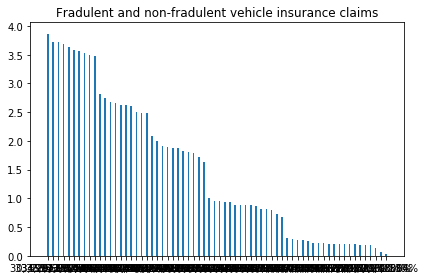

In [44]:
ticks = yax
data_for_plotting = list_vc
ind = np.arange(len(data_for_plotting))
fig = plt.figure(tight_layout=True) # need tight_layout to make everything fit
ax = plt.subplot(1, 1, 1)
ax.bar(ind, data_for_plotting, 0.3, align='center', label="%")
# plt.legend() - legend is useless in this plot
plt.title('Fradulent and non-fradulent vehicle insurance claims')
y_pos = range(len(yax))
plt.xticks(y_pos, yax)
plt.draw()  # this is needed because get_window_extent needs a renderer to work
plt.savefig(os.getcwd() + '/../Plots/age_value_counts_' + file_name_time + '.png')
plt.draw()
plt.show()